![CO2 emissions](co2.png)

The energy sector involves intricate experiments to improve efficiency and sustainability. Proper experimental design helps to maximize insights and minimize errors. There are two common types of experimental design: factorial designs, which study multiple independent variables within a single experiment, and randomized block designs, which group experimental units to control variance. Understanding when to use each design is crucial for energy-related studies.

An environmental research team is investigating the impact of various fuel sources on CO2 emissions across different geographical regions. The goal is to understand which assigned fuel source contributes the most to CO2 emissions and whether this varies depending on location. The team has collected data from four distinct geographical regions: North, South, East, and West. In each region, multiple fuel sources—Natural Gas, Biofuel, and Coal—are used to generate energy. The resulting CO2 emissions are measured to evaluate the environmental impact of each fuel source.

As the data scientist on this project, you have access to two datasets, each representing data from one of the two mentioned experimental designs. The aim is to determine whether a factorial design or a randomized block design was used for the given experimental setup above and to analyze the dataset to identify key patterns and insights. 

In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, ttest_ind
from statsmodels.sandbox.stats.multicomp import multipletests

# Load datasets
energy_design_a = pd.read_csv("energy_design_a.csv")
energy_design_b = pd.read_csv("energy_design_b.csv")

In [2]:
# Display the first few rows of each dataset
print("Dataset A:")
display(energy_design_a.head())
print("\nDataset B:")
display(energy_design_b.head())

Dataset A:


,Fuel_Source,Building_Type,Energy_Usage
0,Natural_Gas,Residential,576.997736
1,Biofuel,Commercial,626.838952
2,Natural_Gas,Commercial,542.448624
3,Natural_Gas,Residential,594.053558
4,Natural_Gas,Commercial,413.235891



Dataset B:


,Geographical_Region,Fuel_Source,CO2_Emissions
0,North,Natural_Gas,11.490142
1,North,Natural_Gas,9.585207
2,North,Natural_Gas,11.943066
3,North,Natural_Gas,14.569090
4,North,Natural_Gas,9.297540


In [3]:
# Store the experimental design types for each dataset
design_a = "factorial"
design_b = "randomized_block"

print(f"Design for Dataset A: {design_a}")
print(f"Design for Dataset B: {design_b}")


Design for Dataset A: factorial
Design for Dataset B: randomized_block


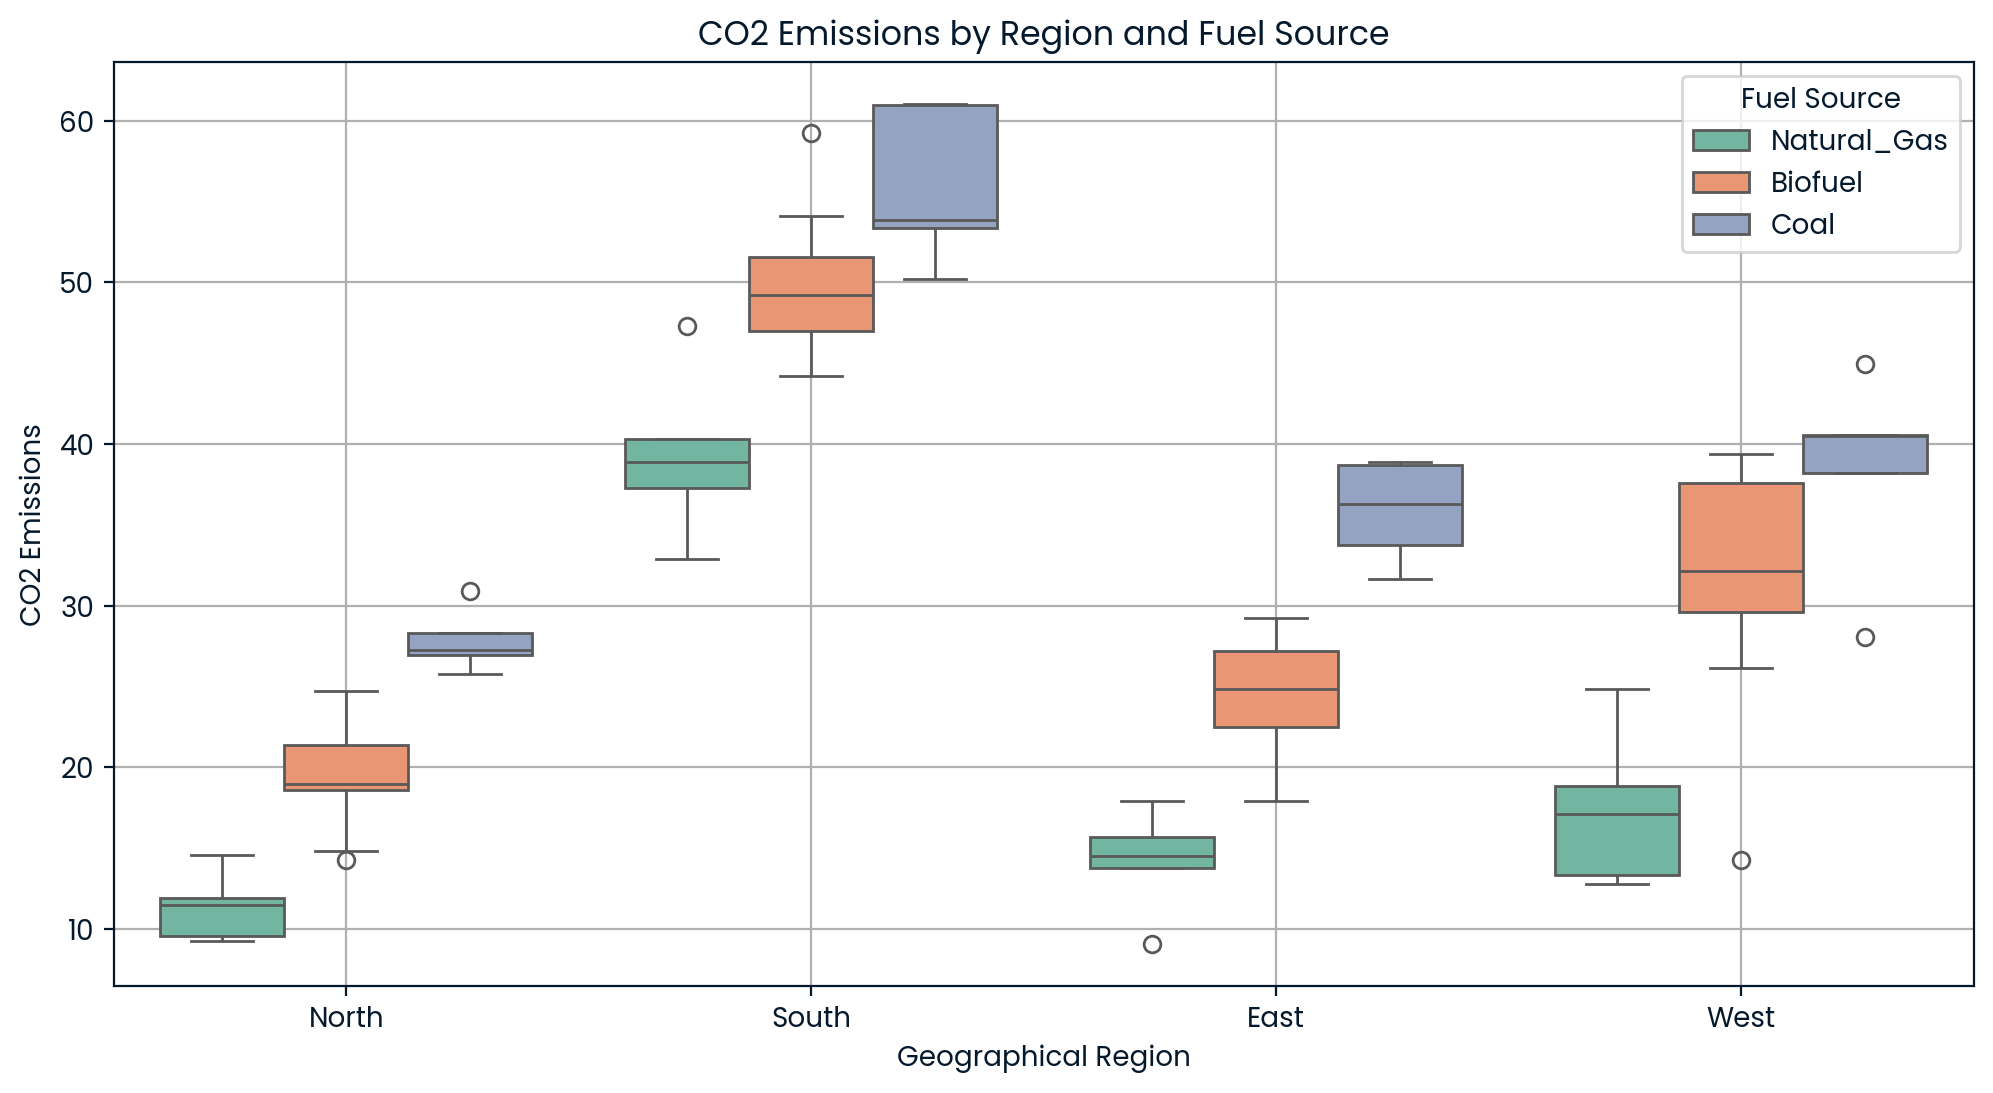

In [4]:
# Set the plot size for better visibility
plt.figure(figsize=(12, 6))

# Create a boxplot to visualize CO2 emissions by region and fuel source
sns.boxplot(
    data=energy_design_b,
    x="Geographical_Region",
    y="CO2_Emissions",
    hue="Fuel_Source",
    palette="Set2"
)

# Add plot title and labels
plt.title("CO2 Emissions by Region and Fuel Source")
plt.xlabel("Geographical Region")
plt.ylabel("CO2 Emissions")
plt.legend(title="Fuel Source", loc="upper right")
plt.grid(True)
plt.show()


In [5]:
# Store the results in variables
highest_co2_region = "South"
highest_co2_source = "Coal"

print(f"Highest CO2 Region: {highest_co2_region}")
print(f"Highest CO2 Fuel Source: {highest_co2_source}")


Highest CO2 Region: South
Highest CO2 Fuel Source: Coal


In [6]:
# Perform ANOVA to test if there are significant differences in CO2 emissions by fuel source, grouped by region
regions = energy_design_b['Geographical_Region'].unique()
test_results = {}

# Perform ANOVA for each region separately
for region in regions:
    subset = energy_design_b[energy_design_b['Geographical_Region'] == region]
    anova_result = f_oneway(
        subset[subset['Fuel_Source'] == 'Natural_Gas']['CO2_Emissions'],
        subset[subset['Fuel_Source'] == 'Biofuel']['CO2_Emissions'],
        subset[subset['Fuel_Source'] == 'Coal']['CO2_Emissions']
    )
    test_results[region] = anova_result.pvalue

# Convert test results to a pandas Series
test_results = pd.Series(test_results)

# Display the ANOVA test results
print("ANOVA Test Results (p-values):")
print(test_results)


ANOVA Test Results (p-values):
North    1.443934e-07
South    1.586922e-04
East     7.046451e-08
West     3.828049e-04
dtype: float64


In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform pairwise comparisons using Tukey's HSD test for each region
diff_results = {}

for region in regions:
    subset = energy_design_b[energy_design_b['Geographical_Region'] == region]
    
    # Perform Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(
        endog=subset['CO2_Emissions'],
        groups=subset['Fuel_Source'],
        alpha=0.05
    )
    diff_results[region] = tukey_result.summary()

# Display the post-hoc test results
for region, result in diff_results.items():
    print(f"\nPost-Hoc Analysis Results for {region} Region:")
    print(result)



Post-Hoc Analysis Results for North Region:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1    group2   meandiff p-adj   lower    upper   reject
------------------------------------------------------------
Biofuel        Coal   8.4932 0.0001   4.6649  12.3216   True
Biofuel Natural_Gas  -7.9811 0.0001 -11.8094  -4.1527   True
   Coal Natural_Gas -16.4743    0.0 -20.8949 -12.0537   True
------------------------------------------------------------

Post-Hoc Analysis Results for South Region:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2   meandiff p-adj   lower    upper  reject
-----------------------------------------------------------
Biofuel        Coal   6.1744 0.0765  -0.5845 12.9334  False
Biofuel Natural_Gas -10.3843 0.0029 -17.1433 -3.6254   True
   Coal Natural_Gas -16.5588 0.0001 -24.3633 -8.7542   True
-----------------------------------------------------------

Post-Hoc Analysis Results for East Region:
    Multiple Compar

In [8]:
# Store insights in variables
significant_differences = pd.Series({
    "North": ["Coal > Biofuel > Natural Gas"],
    "South": ["Coal ≈ Biofuel > Natural Gas"],
    "East": ["Coal > Biofuel > Natural Gas"],
    "West": ["Coal ≈ Biofuel > Natural Gas"]
})

# Store pairwise significant differences results
diff_results_summary = {
    "North": diff_results["North"],
    "South": diff_results["South"],
    "East": diff_results["East"],
    "West": diff_results["West"]
}

# Display final insights
print("Significant Differences Summary:")
print(significant_differences)


Significant Differences Summary:
North    [Coal > Biofuel > Natural Gas]
South    [Coal ≈ Biofuel > Natural Gas]
East     [Coal > Biofuel > Natural Gas]
West     [Coal ≈ Biofuel > Natural Gas]
dtype: object


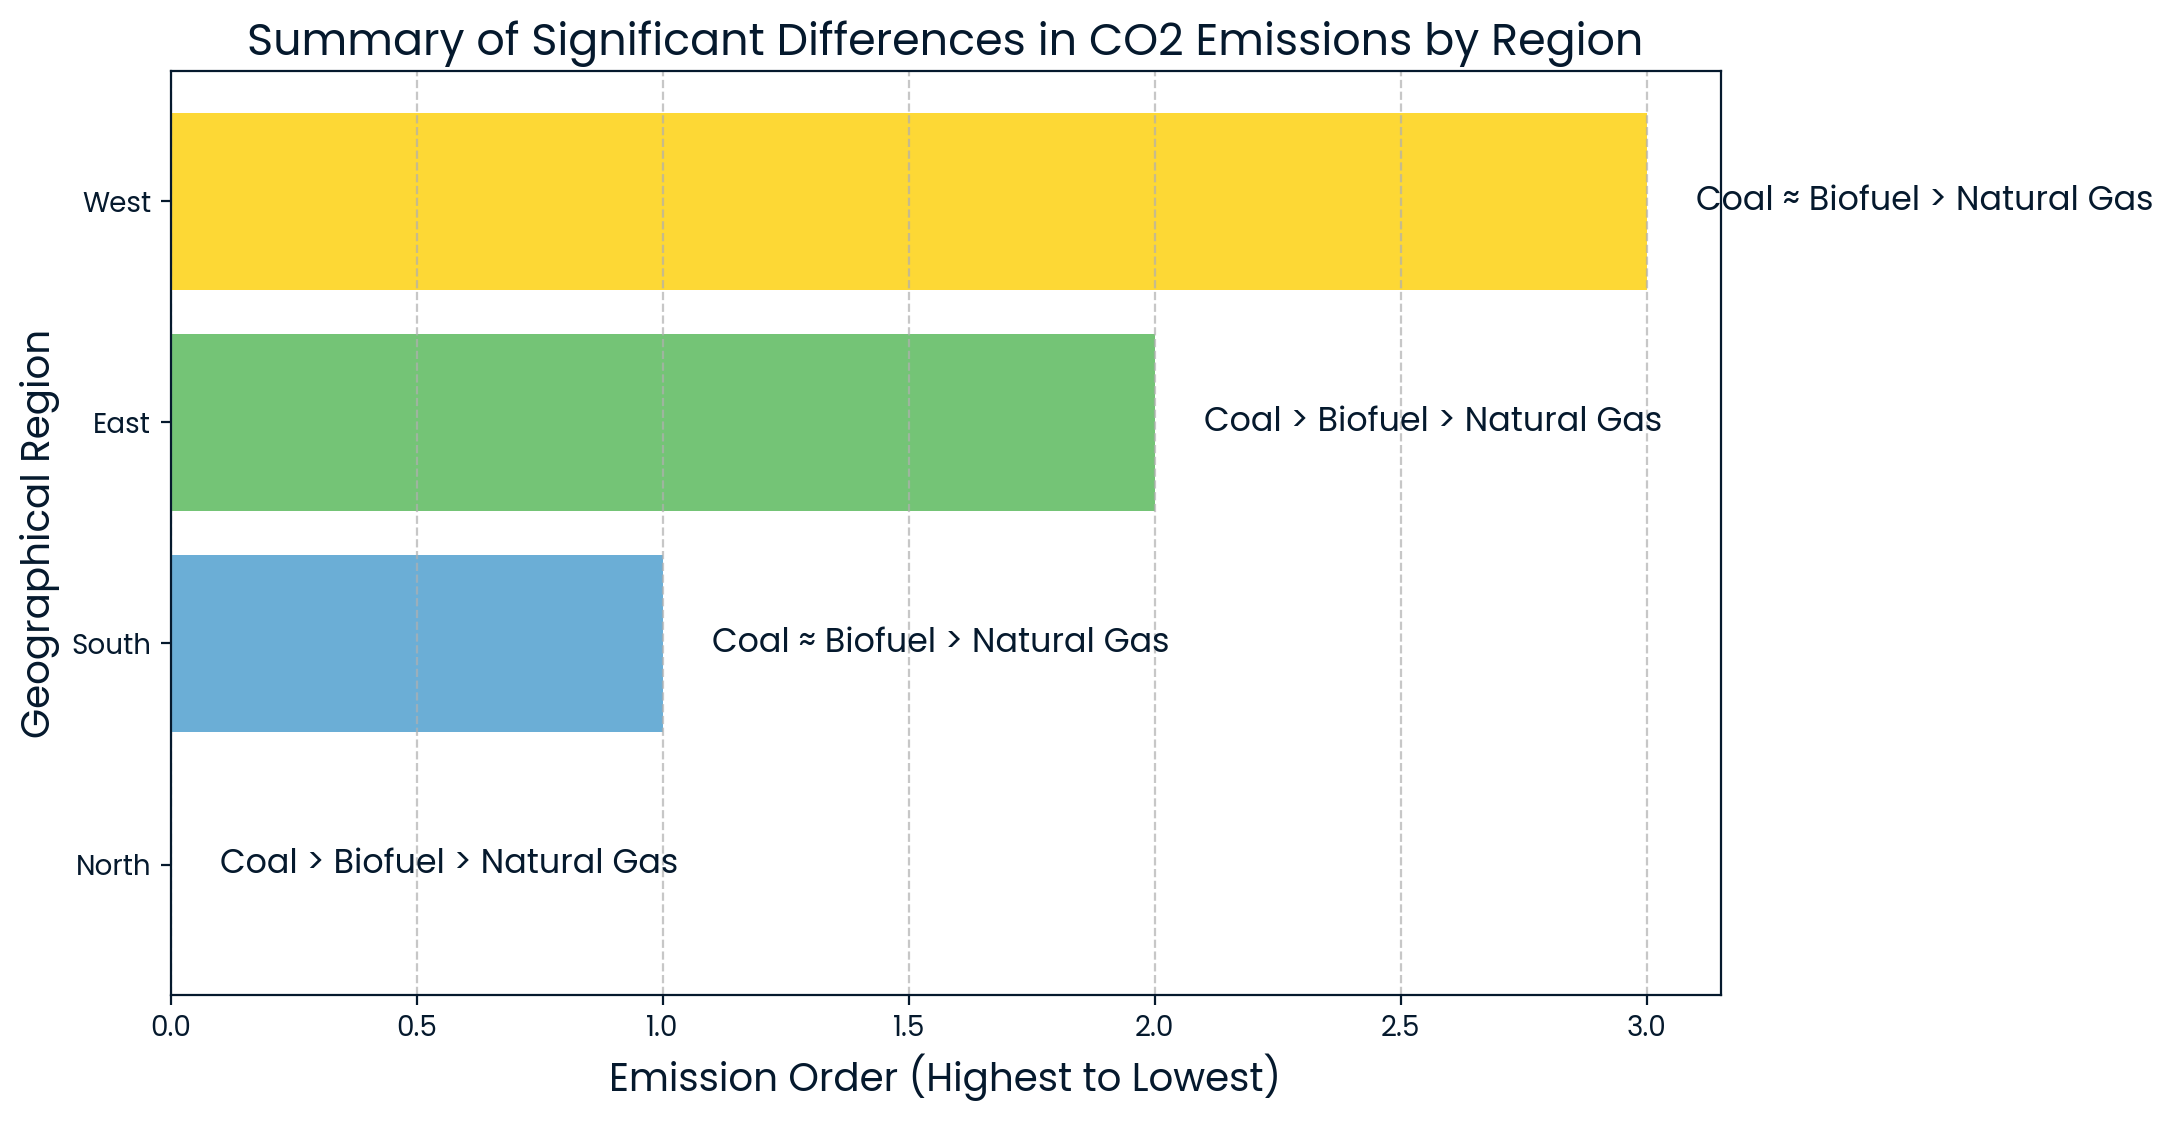

In [10]:
import matplotlib.pyplot as plt

# Prepare the data for visualization
regions = ["North", "South", "East", "West"]
emission_order = [
    "Coal > Biofuel > Natural Gas",
    "Coal ≈ Biofuel > Natural Gas",
    "Coal > Biofuel > Natural Gas",
    "Coal ≈ Biofuel > Natural Gas"
]

# Create a DataFrame for visualization
summary_df = pd.DataFrame({
    "Region": regions,
    "Emission Order": emission_order
})

# Plot the summary as a bar chart
plt.figure(figsize=(10, 6))
colors = ['#FF6F61', '#6BAED6', '#74C476', '#FDD835']

# Create the bar plot
bars = plt.barh(summary_df["Region"], range(len(regions)), color=colors)

# Add text labels for emission order
for i, bar in enumerate(bars):
    plt.text(
        bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
        summary_df["Emission Order"][i],
        va='center', fontsize=12
    )

# Add titles and labels
plt.title("Summary of Significant Differences in CO2 Emissions by Region", fontsize=16)
plt.xlabel("Emission Order (Highest to Lowest)", fontsize=14)
plt.ylabel("Geographical Region", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
